## Observations and Insights 

* According to the data, it seems that Capumulin and Ramicane were most effective in reducing Tumor Volume. They each have the smallest interquartile range, as well as smaller tumor volumes overall.

* There is a strong correlation between weight and tumor size in mice on the Capomulin treatment.

* Lastly, we notice that Infubinol has the highest number of outliers (2). 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
meta_results = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
meta_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_byid = len(meta_results['Mouse ID'].unique())

mouse_byid

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = meta_results[meta_results.duplicated(['Mouse ID', 'Timepoint'])]

dupes['Mouse ID']

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# c_mr = clean meta results

c_mr = meta_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

c_mr

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_byid = len(c_mr['Mouse ID'].unique())

mice_byid

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

regimen_ts = c_mr.groupby(['Drug Regimen'])

tv_bydrug = regimen_ts['Tumor Volume (mm3)']
tv_bydrug_mean = tv_bydrug.mean()
tv_bydrug_median = tv_bydrug.median()
tv_bydrug_var = tv_bydrug.var()
tv_bydrug_std = tv_bydrug.std()
tv_bydrug_sem = tv_bydrug.sem()

tv_bydrug_summed = pd.DataFrame({"Mean": tv_bydrug_mean,
                                "Median": tv_bydrug_median,
                                "Variance": tv_bydrug_var,
                                "STD": tv_bydrug_std,
                                "SEM": tv_bydrug_sem})

tv_bydrug_summed

# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

one_line_summed = c_mr.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median', 'var', 'std', 'sem'])

one_line_summed

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

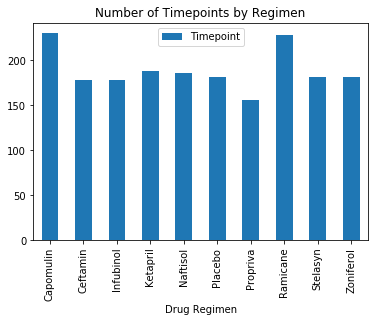

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_bydrug = c_mr.groupby(['Drug Regimen'])['Timepoint'].count()
df_timepoint_bydrug = pd.DataFrame(timepoint_bydrug)
df_timepoint_bydrug.plot(kind='bar', title="Number of Timepoints by Regimen")


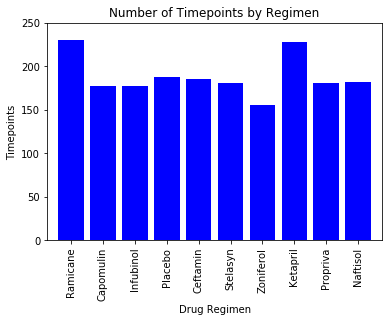

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = c_mr['Drug Regimen'].unique()
x_axis = np.arange(len(drugs))
y_axis = timepoint_bydrug

plt.bar(x_axis, y_axis, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+20)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("Number of Timepoints by Regimen")

plt.show()


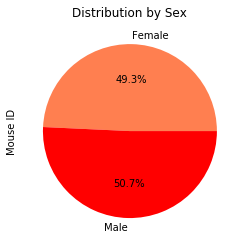

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_dist = c_mr.groupby(['Sex'])['Mouse ID'].count().plot(kind='pie', y='Mouse ID', autopct='%1.1f%%', colors=['coral', 'red'], title="Distribution by Sex")
# sex_dist_df = pd.DataFrame(sex_dist)

# sex_dist_df
plt.show()

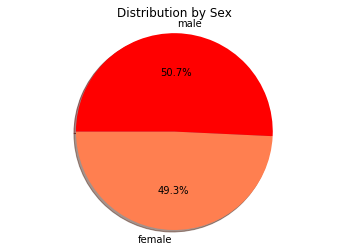

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['female', 'male']
sex_dist = c_mr.groupby(['Sex'])['Mouse ID'].count()
sizes = sex_dist
colors = ["coral", "red"]
plt.pie(sizes, explode=None, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.title("Distribution by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# mice_new = c_mr.drop_duplicates(subset=["Mouse ID"], keep='last')
# mice_new.head()
mice_new = c_mr.groupby(['Mouse ID'])['Timepoint'].max()
mice_max_df = pd.DataFrame(mice_new)
max_points_df = pd.merge(mice_max_df, c_mr, on=['Mouse ID', 'Timepoint'])
# max_points_df = max_points_df.set_index('Drug Regimen')

max_points_df = max_points_df.drop(['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'], axis=1)
max_points_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
244,z435,10,Propriva,48.710661
245,z578,45,Ramicane,30.638696
246,z581,45,Infubinol,62.754451
247,z795,45,Naftisol,65.741070


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_bydrug = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for value in drugs:
    vol_fin = max_points_df.loc[max_points_df['Drug Regimen'] == value, 'Tumor Volume (mm3)']
    vol_bydrug.append(vol_fin)
    
# Determine outliers using upper and lower bounds

    quartiles = vol_fin.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = vol_fin.loc[(vol_fin < lower_bound)|(vol_fin > upper_bound)]

    print(f"{value}")
    # print(f"The lower quartile for {value} of Tumor Volume is: {lowerq}")
    # print(f"The upper quartile for {value} of Tumor Volume is: {upperq}")
    print(f"The interquartile range for {value} of Tumor Volume is: {round(iqr)}")
    # print(f"The the median for {value} of Tumor Volume is: {quartiles[0.5]} ")
    print(f"Tumor Volumes below {round(lower_bound)} could be outliers for {value}.")
    print(f"Tumor Volumes above {round(upper_bound)} could be outliers for {value}.")
    print(f"Potential outliers for {value} are: {(outliers)}")
    print("-------------------------------------------")

Capomulin
The interquartile range for Capomulin of Tumor Volume is: 8.0
Tumor Volumes below 21.0 could be outliers for Capomulin.
Tumor Volumes above 52.0 could be outliers for Capomulin.
Potential outliers for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------------
Ramicane
The interquartile range for Ramicane of Tumor Volume is: 9.0
Tumor Volumes below 18.0 could be outliers for Ramicane.
Tumor Volumes above 54.0 could be outliers for Ramicane.
Potential outliers for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------------
Infubinol
The interquartile range for Infubinol of Tumor Volume is: 11.0
Tumor Volumes below 37.0 could be outliers for Infubinol.
Tumor Volumes above 83.0 could be outliers for Infubinol.
Potential outliers for Infubinol are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
-------------------------------------------
Ceftamin
The interquartile rang

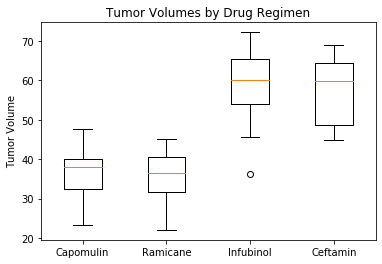

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes by Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(vol_bydrug, labels=drugs)
plt.show()

## Line and Scatter Plots

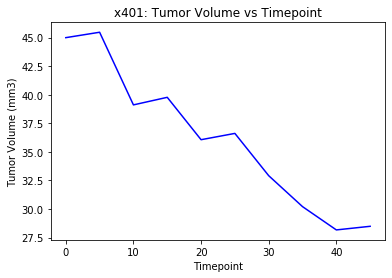

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_1 = c_mr.loc[c_mr['Mouse ID'] == "x401"]

mouse_1_vol = mouse_1['Tumor Volume (mm3)']
mouse_1_time = mouse_1['Timepoint']

plt.plot(mouse_1_time, mouse_1_vol, color="blue", label="Capomulin")
plt.title("x401: Tumor Volume vs Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


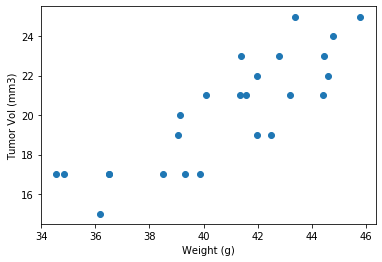

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mice = c_mr.loc[c_mr['Drug Regimen'] == "Capomulin"]
cap_mice_avg = cap_mice.groupby(['Mouse ID']).mean()

x_values = cap_mice_avg['Tumor Volume (mm3)']
y_values = cap_mice_avg['Weight (g)']

plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Vol (mm3)')
plt.show()

## Correlation and Regression

Correlation is 0.84


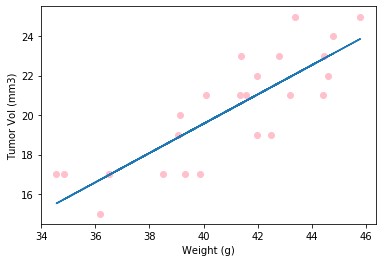

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color="pink")
plt.plot(x_values,regress_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Vol (mm3)')
plt.show()
